In [19]:
#Reading The display_name, mean_location of nodes
display_df <- read.delim('display_name2.txt',header = F, sep = '\t')
mean_location_df <- read.delim('mean_location_coordinates.txt',header = F,encoding='UTF-8', sep = '\t')

In [48]:
nrow(display_df)

[1] 2710

In [50]:
nrow(mean_location_df)

[1] 2710

In [22]:
library("igraph")
# Creating graph and adding weight attribute to edges
edgelistFile <- read.table("location_edge_list.txt")
g=graph.data.frame(edgelistFile, directed=F)
g = set_edge_attr(g, 'weight', index = E(g), E(g)$V3)

In [25]:
length(V(g))

[1] 1887

In [26]:
clusters_g =clusters(g)

In [27]:
clusters_g$csize

[1] 1880    5    2

# Giant Connected Component

In [28]:
gc = induced.subgraph(g, V(g)[which(clusters_g$membership == which.max(clusters_g$csize))])

In [29]:
length(E(gc))

[1] 311802

# Q 7 Minimum Spanning Tree

In [30]:
#Minimum spanning tree
g_mst = mst(gc, weights = E(gc)$weight)

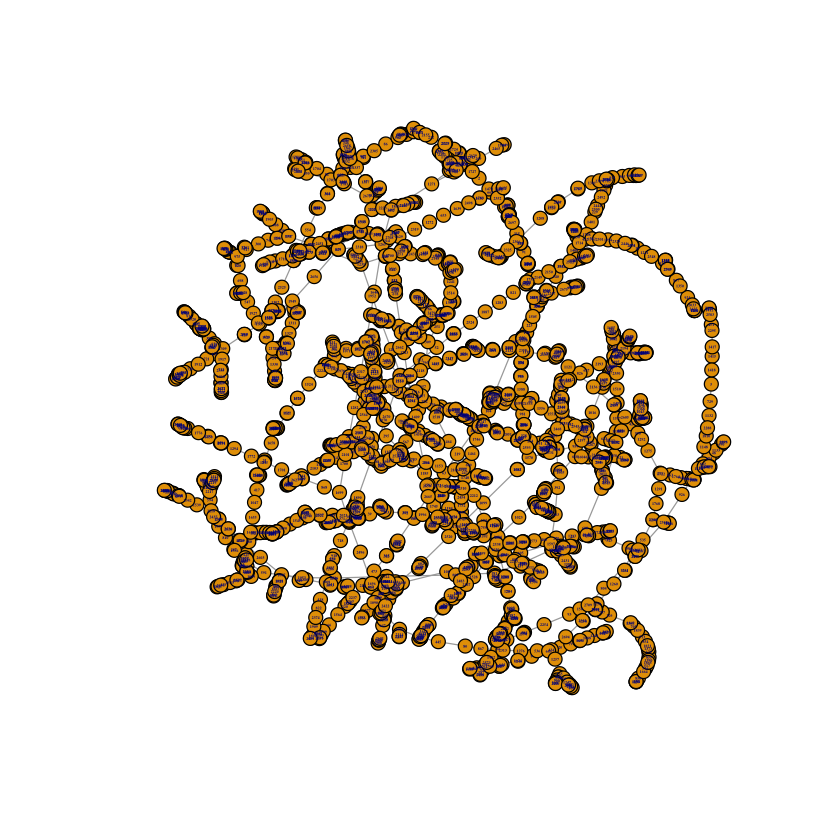

In [31]:
plot(g_mst,vertex.size=5,vertex.label.family="Times",vertex.label.font=2,vertex.label.cex=.2)

In [32]:
#Displaying location endpoints of 10 edges in minimum spanning tree # TODO: CHeck if names or ids of vertex
for(i in c(1:10)){
    edges = E(g_mst)
    e = edges[i*50]
    vl = c(ends(g_mst,e))
    cat(vl[1],vl[2])
    
    cat('\n')
    
    v1name = as.vector(display_df[,2])[which(display_df$V1 == vl[1])]
    v2name = as.vector(display_df[,2])[which(display_df$V1 == vl[2])]
    cat(v1name,'|',v2name)
    cat('\n')
}

37 1357
1800 Newcastle Drive, South Los Altos, Los Altos | 1300 Holly Avenue, Los Altos
73 1995
2100 Fieldcrest Avenue, Fairfield | 7600 Pleasants Valley Road, Vacaville
103 1555
35500 Ebro Court, Centerville, Fremont | 3600 Johnson Court, Northgate, Fremont
137 1219
700 Dellwood Court, Vacaville | 400 Shannon Drive, Vacaville
178 2358
600 Sonoma Avenue, Livermore | 1500 De Leon Way, Livermore
217 1554
38100 Hastings Court, Centerville, Fremont | Fox Avenue, Centerville, Fremont
254 2051
200 Firethorn Drive, Rohnert Park | 5600 State Farm Drive, Rohnert Park
299 532
Chinatown / North Beach Campus, Russian Hill, San Francisco | 200 Beach Street, North Beach, San Francisco
342 2325
10400 Trinity Parkway, Bear Creek, Stockton | Unnamed Road, Stockton
387 2423
2100 Manchester Road, San Leandro | 21800 Tanglewood Drive, Castro Valley


# Q 8 

In [41]:
combinations = data.frame(expand.grid(rep(list(1:100), 3)))
shuffeled_c = combinations[sample(nrow(combinations)),]

In [42]:
v1l <- c(shuffeled_c$Var1)
v2l <- c(shuffeled_c$Var2)
v3l <- c(shuffeled_c$Var3)

In [43]:
cnt = 0
triangle_indices = c()
for(i in c(1:50000)){
    v1 = v1l[i]
    v2 = v2l[i]
    v3 = v3l[i]
    if(v1==v2 ||v2==v3||v3==v1){
        next
    }
    if(get.edge.ids(gc,c(v1l[i],v2l[i]),directed = FALSE) !=0){
        if(get.edge.ids(gc,c(v3l[i],v2l[i]),directed = FALSE) !=0){
            if(get.edge.ids(gc,c(v1l[i],v3l[i]),directed = FALSE)!=0){
#                 print(v1)
#                 print(v2)
#                 print(v3)
                cnt = cnt+1
#                 print(g[v1,v2, edges=TRUE])
#                 print(g[v3,v2, edges=TRUE])
#                 print(g[v1,v3, edges=TRUE])
#                 print("-------")
                triangle_indices = c(triangle_indices, i)
            }
        }
    }       
}

In [44]:
cnt

[1] 1251

In [45]:
edge_l = E(gc)
satisfied = 0
tc = 0
for(i in triangle_indices[1:1000]){
  tc = tc+1
    #print(i)
   ew1 = edge_l$weight[get.edge.ids(gc,c(v1l[i],v2l[i]),directed = FALSE)]
   # print(ew1)
   ew2 = edge_l$weight[get.edge.ids(gc,c(v3l[i],v2l[i]),directed = FALSE)]
   # print(ew2)
    
   ew3 = edge_l$weight[get.edge.ids(gc,c(v3l[i],v1l[i]),directed = FALSE)]
   # print(ew3)
    
    #cat(v3l[i],v2l[i],v1l[i],'\n')
    
   if(ew1+ew2>ew3){
       if(ew1+ew3>ew2){
           if(ew2+ew3>ew1){
               satisfied = satisfied + 1
           }
       }
   }
    
}

In [46]:
satisfied

[1] 900

In [68]:
edge_l = E(gc)
satisfied = 0
tc = 0
for(i in triangle_indices){
  tc = tc+1
    #print(i)
   ew1 = edge_l$weight[get.edge.ids(gc,c(v1l[i],v2l[i]),directed = FALSE)]
   # print(ew1)
   ew2 = edge_l$weight[get.edge.ids(gc,c(v3l[i],v2l[i]),directed = FALSE)]
   # print(ew2)
    
   ew3 = edge_l$weight[get.edge.ids(gc,c(v3l[i],v1l[i]),directed = FALSE)]
   # print(ew3)
    
    #cat(v3l[i],v2l[i],v1l[i],'\n')
    
   if(ew1+ew2>ew3){
       if(ew1+ew3>ew2){
           if(ew2+ew3>ew1){
               satisfied = satisfied + 1
           }
       }
   }
    
}

print(length(triangle_indices))
print(satisfied)

[1] 1251
[1] 1128


## 9

In [147]:
## step 1: MST

g_mst = mst(gc, E(gc)$weight)

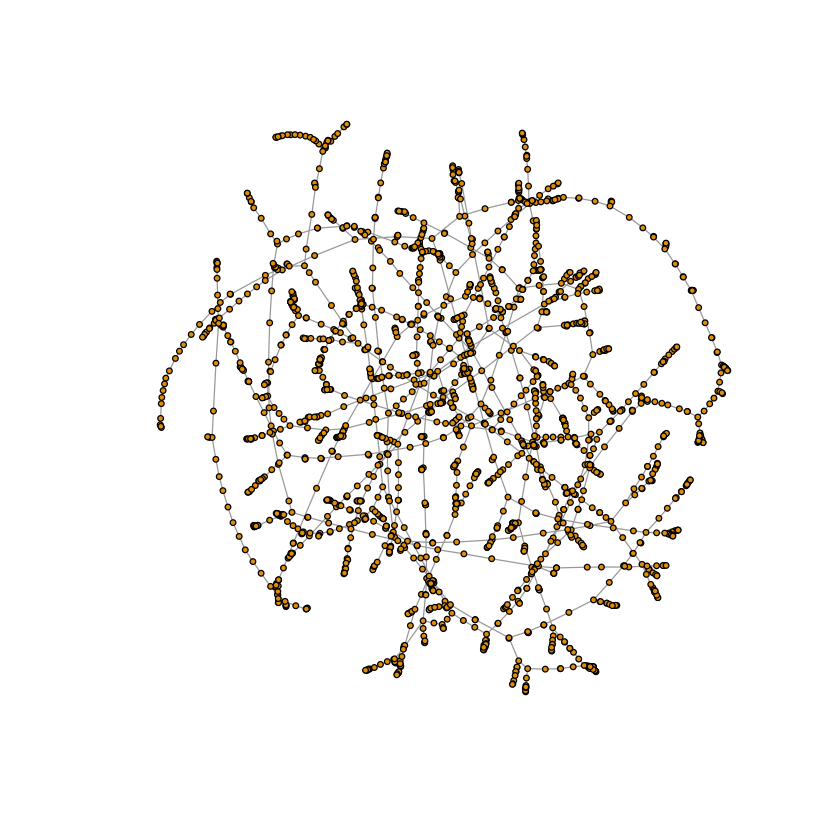

In [149]:
plot(g_mst, vertex.size = 2, vertex.label = NA)

In [144]:
# esg <- function(v){
    
#     if(degree(g_mst, v = v) == 0){
#         t = c(v)
#         print(t)
#         return(t)
        
#     }
#     else{
        
#         init_walk = dfs(g_mst, v)$order
#         init_walk = c(init_walk, c(v))

#         print(init_walk)
        
#     }
    
# }
# esg(V(g_mst)[1])

In [383]:
l = V(g_mst)
v = sample(l, 1)
print(v)

+ 1/1880 vertex, named, from 2cbce37:
[1] 2541


In [384]:
path = dfs(g_mst, v)$order
path = c(path, c(v))
path 

+ 1881/1880 vertices, named, from 2cbce37:
   [1] 2541 40   401  572  439  1205 1215 135  1991 1213 23   270  400  573 
  [15] 2439 1206 2538 399  1203 73   1204 1995 1982 7    25   753  1217 2336
  [29] 2672 1216 136  1218 752  2389 6    366  2398 1990 2235 297  1479 94  
  [43] 1482 2573 2082 951  587  2086 1488 384  586  2574 2254 93   150  2709
  [57] 804  92   2568 188  505  1146 926  1814 842  694  48   1133 690  1897
  [71] 1898 880  2569 898  2599 852  1148 1810 2288 1132 729  5    1418 1415
  [85] 1417 2295 451  2583 1412 1410 2383 1999 707  126  1369 705  1839 513 
  [99] 854  1821 1373 179  855  1390 1865 517  516  1664 850  111  13   1194
 [113] 1177 1842 1845 1371 2252 2542 137  754  1219 2589 2005 806  1201 2588
 [127] 1202 2029 2020 1184 2126 2272 1185 182  1183 295  840  2067 146  761 
+ ... omitted several vertices

In [385]:
distMatrix <- shortest.paths(g_mst, v=V(g_mst), to=V(g_mst))

In [386]:
one = V(gc)[which(V(gc) == path[10])]
two = V(gc)[which(V(gc) == path[11])]
t = E(gc)[one %--% two]$weight

path[10]

+ 1/1880 vertex, named, from 2cbce37:
[1] 1213

In [387]:
# edge_attr(gc, "weight", get.edge.ids(g_mst, c(path[1], path[2])))
print(E(g_mst)[path[10] %--% path[11]]$weight)
print(t)
print(min(shortest.paths(g_mst, to = path[10], v  = path[11])))
# print(min(shortest.paths(g_mst, to = path[8], v  = path[9])))

[1] 165.015
[1] 165.015
[1] 165.015


In [388]:
sum = 0
for(i in 2:length(path)){
    print(paste(i-1, i))
    t = E(g_mst)[path[i-1] %--% path[i]]$weight
    
    if(!length(t)){
        one = V(gc)[which(V(gc) == path[i-1])]
        two = V(gc)[which(V(gc) == path[i])]
        t = E(gc)[one %--% two]$weight 
        
        if(!length(t)){
            t = min(shortest.paths(g_mst, to = path[i-1], v  = path[i]))
        }
        
    }
    
    sum = sum+ t
    print(t)
}

[1] "1 2"
[1] 177.505
[1] "2 3"
[1] 153.515
[1] "3 4"
[1] 148.93
[1] "4 5"
[1] 143.78
[1] "5 6"
[1] 189.82
[1] "6 7"
[1] 236.42
[1] "7 8"
[1] 262.18
[1] "8 9"
[1] 578.3
[1] "9 10"
[1] 1321.235
[1] "10 11"
[1] 165.015
[1] "11 12"
[1] 192.87
[1] "12 13"
[1] 162.44
[1] "13 14"
[1] 202.7
[1] "14 15"
[1] 181.215
[1] "15 16"
[1] 181.545
[1] "16 17"
[1] 201.08
[1] "17 18"
[1] 194.345
[1] "18 19"
[1] 109.005
[1] "19 20"
[1] 146.59
[1] "20 21"
[1] 153.825
[1] "21 22"
[1] 242.345
[1] "22 23"
[1] 236.95
[1] "23 24"
[1] 186.055
[1] "24 25"
[1] 161.69
[1] "25 26"
[1] 179.655
[1] "26 27"
[1] 185.385
[1] "27 28"
[1] 188.475
[1] "28 29"
[1] 507.675
[1] "29 30"
[1] 169.69
[1] "30 31"
[1] 170.88
[1] "31 32"
[1] 135.58
[1] "32 33"
[1] 331.61
[1] "33 34"
[1] 179.225
[1] "34 35"
[1] 238.78
[1] "35 36"
[1] 247.935
[1] "36 37"
[1] 397.09
[1] "37 38"
[1] 199.85
[1] "38 39"
[1] 204.34
[1] "39 40"
[1] 183.275
[1] "40 41"
[1] 442.36
[1] "41 42"
[1] 67.51
[1] "42 43"
[1] 79.19
[1] "43 44"
[1] 105.59
[1] "44 45"
[

In [376]:
sum

[1] 479421.3

In [377]:
l = E(g_mst)$weight

In [378]:
Reduce('+', l)

[1] 279408.2

In [379]:
479421.29/279408.18

[1] 1.715846

## Q 10

In [459]:
lat = c()
long = c()

for(i in 1:length(path)){
    lat = c(lat, mean_location_df$V2[mean_location_df$V1 == path[i]])
    long = c(long, mean_location_df$V3[mean_location_df$V1 == path[i]])
}

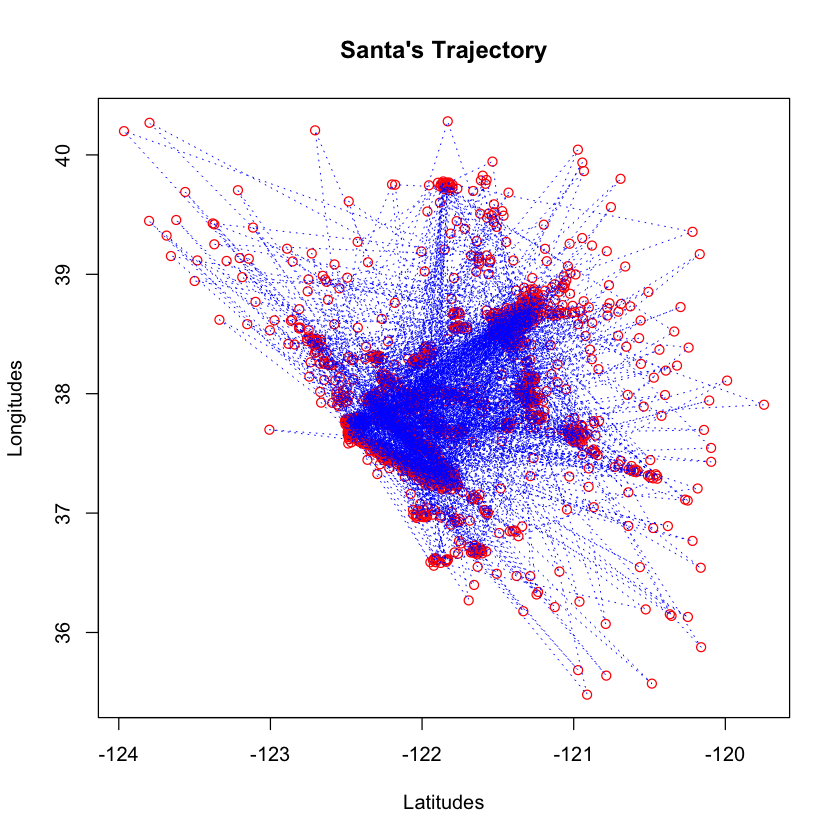

In [485]:
plot(lat, long, col='red', main="Santa's Trajectory", xlab="Latitudes", ylab="Longitudes")
lines(lat, long, type='l', lty=3, lwd=0.75, col = 'blue')

In [448]:
n = length(path)-1
op <- matrix(ncol = 3, nrow=n)

for(i in 1:n){
    
    t = E(g_mst)[path[i] %--% path[i+1]]$weight
    
#     if(!length(t)){
#         one = V(gc)[which(V(gc) == path[i])]
#         two = V(gc)[which(V(gc) == path[i+1])]
#         t = E(gc)[one %--% two]$weight 
        
#         if(!length(t)){
#             t = min(shortest.paths(g_mst, to = path[i], v  = path[i+1]))
#         }
        
#     }
#     print(t)
    if (!length(t)){
        t = NA
    }
    else{
        t = as.numeric(t)
    }
    op[i, ] <- c(as.numeric(path[i]), as.numeric(path[i+1]), t)
}

In [453]:
op <- data.frame(op)

In [456]:
g_10=graph.data.frame(op, directed=F)
# g_10 = set_edge_attr(g_10, 'weight', index = E(g_10), E(g_10)$X3)

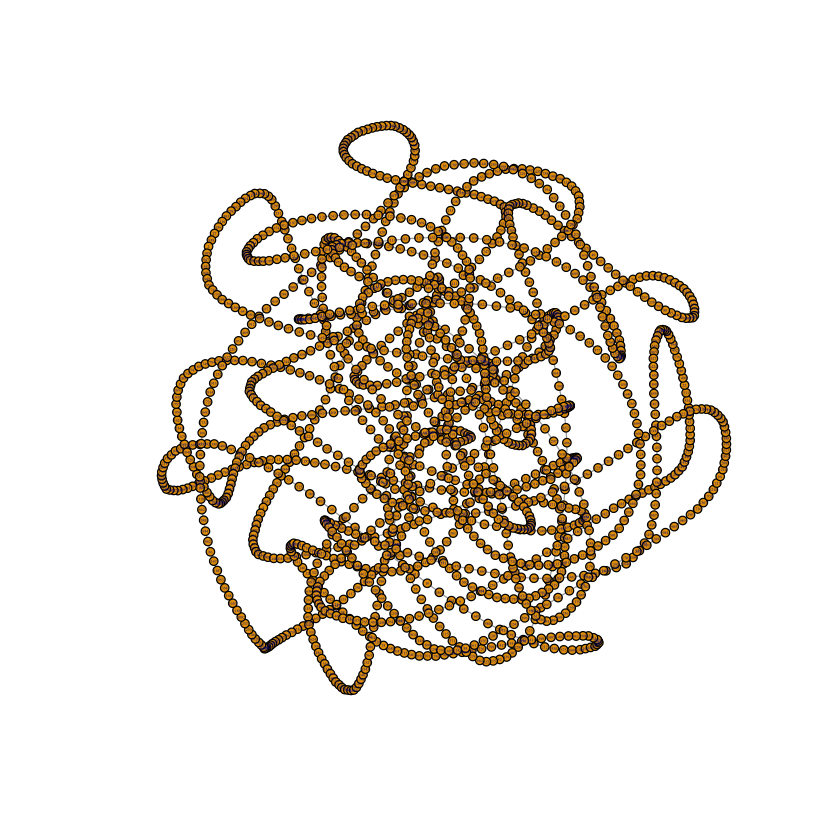

In [457]:
plot(g_10,vertex.size=3,vertex.label.family="Times",vertex.label.font=1,vertex.label.cex=.2)

In [458]:
mean_location_df

V1,V2,V3
1,-120.7887,36.07163
2,-122.2194,37.46959
3,-121.6602,37.15048
4,-121.3428,38.57307
5,-121.3617,38.55443
6,-121.9484,38.36665
7,-121.9961,38.32585
8,-122.6450,38.26188
9,-122.4165,37.78570
10,-121.0600,37.69418
